<a href="https://colab.research.google.com/github/nipun-taneja/dropout-rate-analysis/blob/main/dropout_rate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dropout Rate Experiments on MNIST, Fashion MNIST, and CIFAR-10

This project investigates how different **dropout rates** affect the performance of fully connected neural networks
on three benchmark datasets: **MNIST**, **Fashion MNIST**, and **CIFAR-10**.

---

## Objective
- Compare dropout rate effects across datasets of varying complexity.
- Identify optimal dropout ranges for generalization.
- Provide practical guidelines for model training.

---


## Fashion MNIST Dataset

### Experiment
- Grayscale clothing classification (28x28).
- Dropout rates: {0.0 → 0.99}.

### Results
- Optimal dropout ≈ **0.5**
- Test Accuracy ~ **89.8%**

![FashionMNIST Accuracy](images/fashion_accuracy.png)

*More complex than MNIST, benefits from stronger regularization.*


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with dropout rate: 0.0
Test accuracy: 0.9828799962997437
Training with dropout rate: 0.1
Test accuracy: 0.9818999886512756
Training with dropout rate: 0.3
Test accuracy: 0.9828800201416016
Training with dropout rate: 0.5
Test accuracy: 0.9822800040245057
Training with dropout rate: 0.6
Test accuracy: 0.980840015411377
Training with dropout rate: 0.7
Test accuracy: 0.9789599895477294
Training with dropout rate: 0.8
Test accuracy: 0.9707000017166137
Training with dropout rate: 0.9
Test accuracy: 0.9377400040626526
Training with dropout rate: 0.91
Test accuracy: 0.9185799956321716
Training with dropout rate: 0.93
Test accuracy: 0.7959800004959107
Training with dropout rate: 0.95
Test accuracy: 0.4762799978256226
Training with dropout rate: 0.97
Test accuracy: 0.1910199999809265
Training with dropout rate: 0.99
Test accuracy: 0.11349999904632568


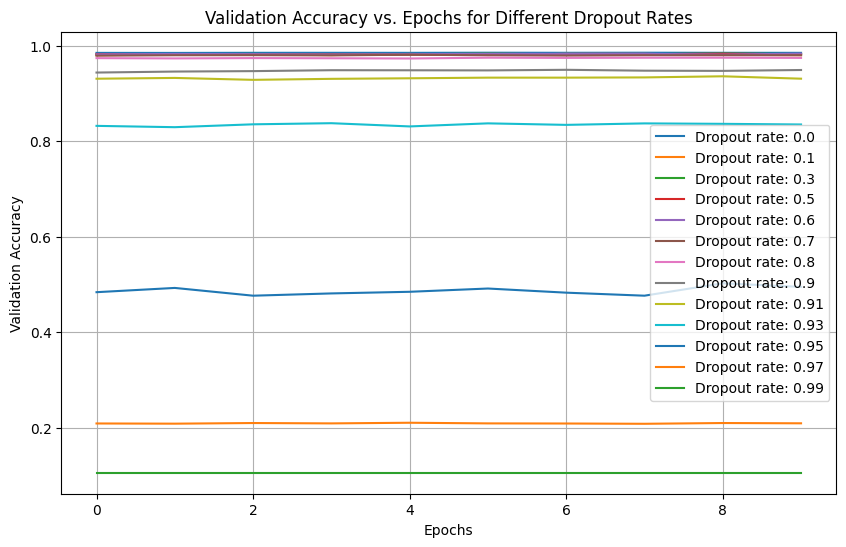

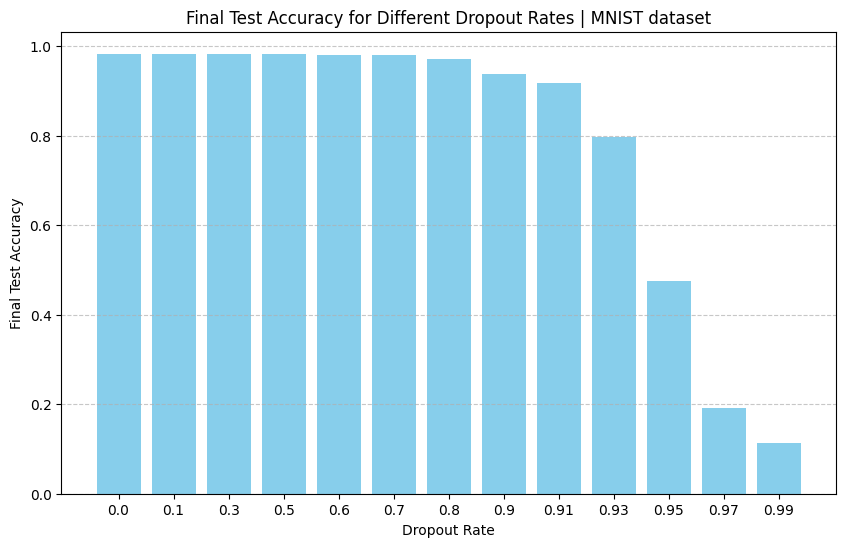

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0  # Normalize to [0, 1]
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape((-1, 28 * 28))  # Flatten to 1D
x_test = x_test.reshape((-1, 28 * 28))

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a function to build a model with a specific dropout rate using Functional API
def build_model(dropout_rate):
    inputs = Input(shape=(28 * 28,))
    x = Dense(512, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different dropout rates
dropout_rates = [0.0, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8,0.9,0.91, 0.93, 0.95, 0.97, 0.99 ]
results = {}
evals = {}

for dropout_rate in dropout_rates:
    print(f"Training with dropout rate: {dropout_rate}")
    model = build_model(dropout_rate)
    for _ in range(5):
      history = model.fit(
          x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2,
          verbose=0
      )

      eval=model.evaluate(x_test, y_test, verbose=0)
      if dropout_rate not in evals:
        evals[dropout_rate] = eval[1]
      else:
        evals[dropout_rate] = evals[dropout_rate] + eval[1]
    evals[dropout_rate] = evals[dropout_rate] / 5
    results[dropout_rate] = history.history['val_accuracy']
    print(f"Test accuracy: {evals[dropout_rate]}")

# Plot validation accuracy for different dropout rates
plt.figure(figsize=(10, 6))
for dropout_rate, val_accuracy in results.items():
    plt.plot(val_accuracy, label=f"Dropout rate: {dropout_rate}")
plt.title("Validation Accuracy vs. Epochs for Different Dropout Rates")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

dropout_rates = list(evals.keys())
final_accuracies = [test_accuracy for test_accuracy in evals.values()]

plt.figure(figsize=(10, 6))
plt.bar([str(rate) for rate in dropout_rates], final_accuracies, color='skyblue')

plt.title("Final Test Accuracy for Different Dropout Rates | MNIST dataset")
plt.xlabel("Dropout Rate")
plt.ylabel("Final Test Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## MNIST Dataset

### Experiment
- Simple grayscale digit classification (28x28).
- Tested dropout rates: {0.0 → 0.99}.
- Network trained for 10 epochs.

### Results
- Optimal dropout ≈ **0.3**
- Test Accuracy ~ **98.3%**

![MNIST Accuracy](images/mnist_accuracy.png)

*Moderate dropout improves generalization; very high dropout reduces learning.*


## MNIST Dataset

### Experiment
- Simple grayscale digit classification (28x28).
- Tested dropout rates: {0.0 → 0.99}.
- Network trained for 10 epochs.

### Results
- Optimal dropout ≈ **0.3**
- Test Accuracy ~ **98.3%**

![MNIST Accuracy](images/mnist_accuracy.png)

*Moderate dropout improves generalization; very high dropout reduces learning.*


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training with dropout rate: 0.0
Test accuracy: 0.8862800002098083
Training with dropout rate: 0.1
Test accuracy: 0.8918800115585327
Training with dropout rate: 0.3
Test accuracy: 0.8877599954605102
Training with dropout rate: 0.5
Test accuracy: 0.8833799839019776
Training with dropout rate: 0.6
Test accuracy: 0.8773399949073791
Training with dropout rate: 0.7
Test accuracy: 0.8686800003051758
Training with dropout rate: 0.8
Test accuracy: 0.8471400022506714
Training with dropout rate: 0.9
Test accuracy: 0.6383600115776062
Training with dropout rate: 0.91
Test accuracy: 0.665340006351471
Training with dropout rate: 0.93
Test accuracy: 0.5560199856758118
Training with dropout rate: 0.95
Test accuracy: 0.2904600024223328
Training with dropout rate: 0.97
Test accuracy: 0.22424000203609468
Training with dr

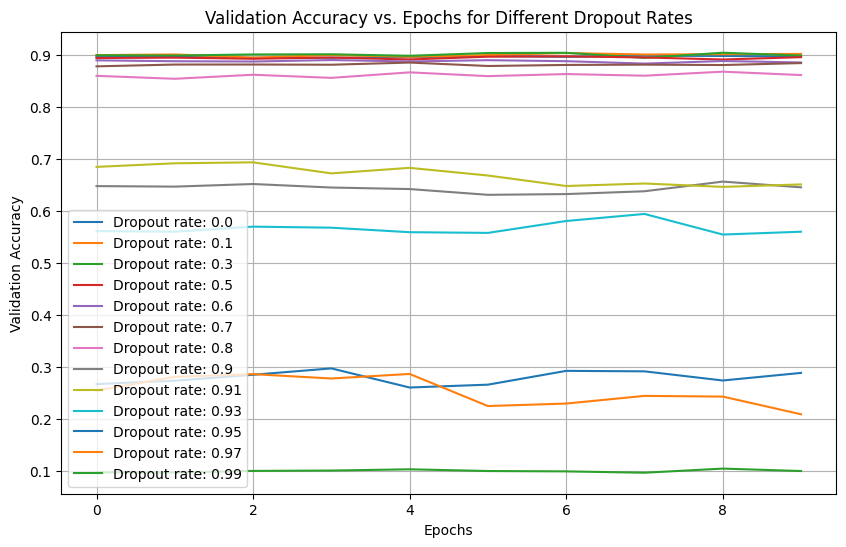

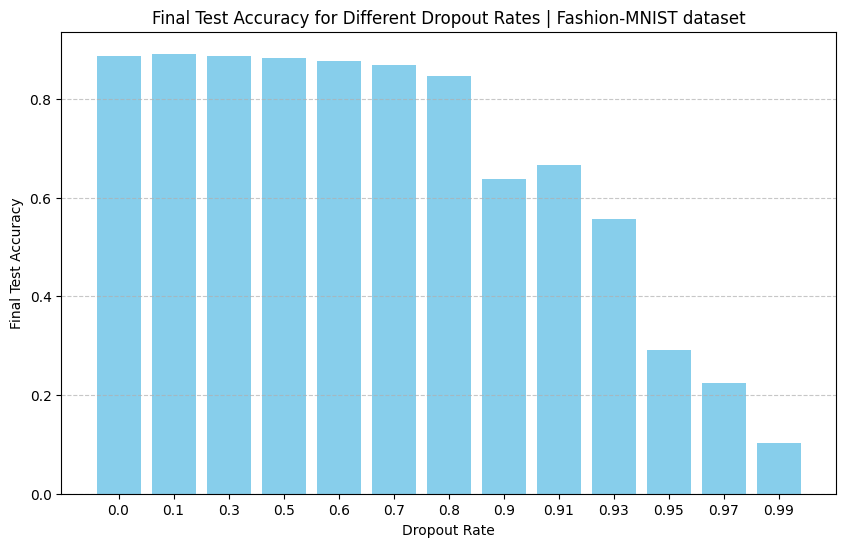

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images from 28x28 pixels to 784-element vectors
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define a function to build a model with a specific dropout rate using Functional API
def build_model(dropout_rate):
    inputs = Input(shape=(28 * 28,))
    x = Dense(512, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different dropout rates
dropout_rates = [0.0, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8,0.9,0.91, 0.93, 0.95, 0.97, 0.99 ]
results = {}
evals = {}

for dropout_rate in dropout_rates:
    print(f"Training with dropout rate: {dropout_rate}")
    model = build_model(dropout_rate)
    for _ in range(5):
      history = model.fit(
          x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2,
          verbose=0
      )

      eval=model.evaluate(x_test, y_test, verbose=0)
      if dropout_rate not in evals:
        evals[dropout_rate] = eval[1]
      else:
        evals[dropout_rate] = evals[dropout_rate] + eval[1]
    evals[dropout_rate] = evals[dropout_rate] / 5
    results[dropout_rate] = history.history['val_accuracy']
    print(f"Test accuracy: {evals[dropout_rate]}")

# Plot validation accuracy for different dropout rates
plt.figure(figsize=(10, 6))
for dropout_rate, val_accuracy in results.items():
    plt.plot(val_accuracy, label=f"Dropout rate: {dropout_rate}")
plt.title("Validation Accuracy vs. Epochs for Different Dropout Rates")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

dropout_rates = list(evals.keys())
final_accuracies = [test_accuracy for test_accuracy in evals.values()]

plt.figure(figsize=(10, 6))
plt.bar([str(rate) for rate in dropout_rates], final_accuracies, color='skyblue')

plt.title("Final Test Accuracy for Different Dropout Rates | Fashion-MNIST dataset")
plt.xlabel("Dropout Rate")
plt.ylabel("Final Test Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## CIFAR-10 Dataset

### Experiment
- Color image classification (32x32 RGB).
- Dropout rates: {0.0 → 0.99}.

### Results
- Optimal dropout ≈ **0.5–0.6**
- Test Accuracy ~ **59.2%**

![CIFAR Accuracy](images/cifar_accuracy.png)

*CIFAR-10 is most sensitive to very high dropout (>0.9), where performance collapses.*


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training with dropout rate: 0.0
Test accuracy: 0.5046599984169007
Training with dropout rate: 0.1
Test accuracy: 0.49390000104904175
Training with dropout rate: 0.3
Test accuracy: 0.4427000045776367
Training with dropout rate: 0.5
Test accuracy: 0.29013999700546267
Training with dropout rate: 0.6
Test accuracy: 0.2511800050735474
Training with dropout rate: 0.7
Test accuracy: 0.1590800017118454
Training with dropout rate: 0.8
Test accuracy: 0.10000000149011612
Training with dropout rate: 0.9
Test accuracy: 0.10000000149011612
Training with dropout rate: 0.91
Test accuracy: 0.10000000149011612
Training with dropout rate: 0.93
Test accuracy: 0.10000000149011612
Training with dropout rate: 0.95
Test accuracy: 0.10000000149011612
Training with dropout rate: 0.97
Test accuracy: 0.10000000149011612
Training with dropout rate: 0.99
Test accuracy: 0.09996000081300735


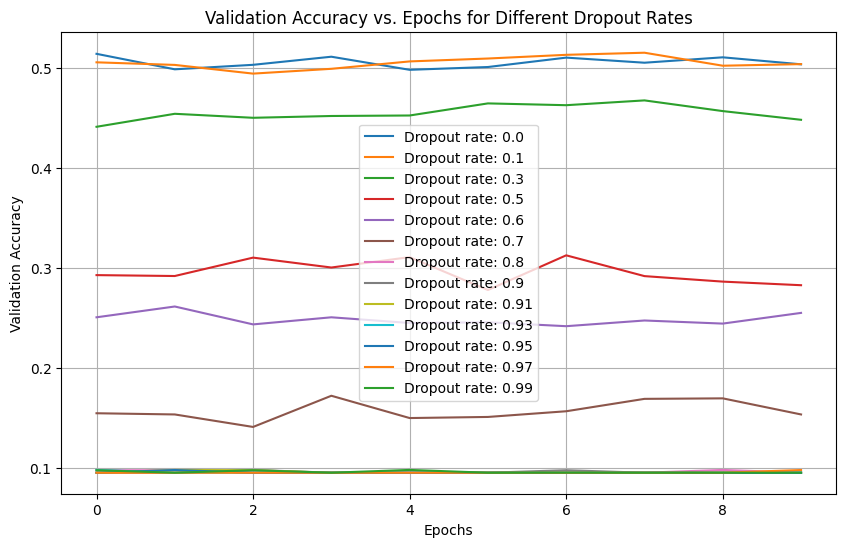

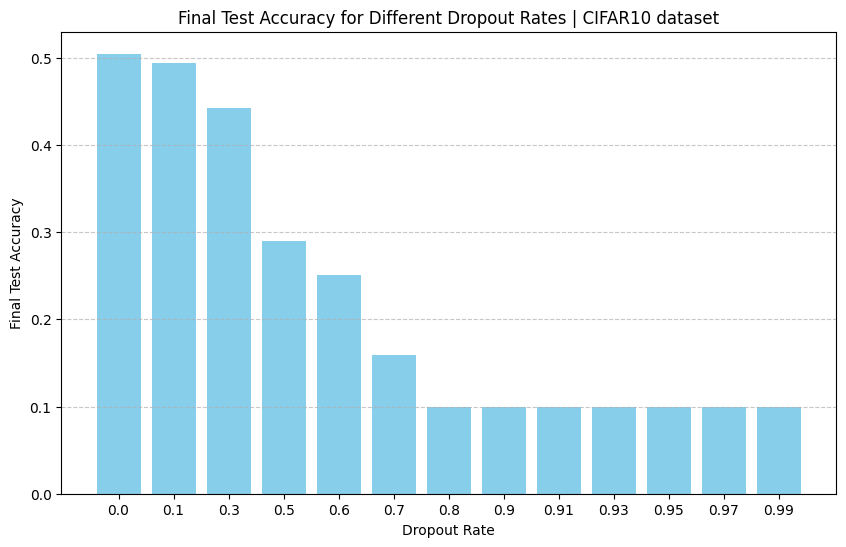

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images from 32x32x3 pixels to 3072-element vectors
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define a function to build a model with a specific dropout rate using Functional API
def build_model(dropout_rate):
    inputs = Input(shape=(32 * 32 * 3, ))
    x = Dense(512, activation='relu')(inputs)
    x = Dropout(dropout_rate)(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Experiment with different dropout rates
dropout_rates = [0.0, 0.1, 0.3, 0.5, 0.6, 0.7, 0.8,0.9,0.91, 0.93, 0.95, 0.97, 0.99 ]
results = {}
evals = {}

for dropout_rate in dropout_rates:
    print(f"Training with dropout rate: {dropout_rate}")
    model = build_model(dropout_rate)
    for _ in range(5):
      history = model.fit(
          x_train, y_train,
          epochs=10,
          batch_size=128,
          validation_split=0.2,
          verbose=0
      )

      eval=model.evaluate(x_test, y_test, verbose=0)
      if dropout_rate not in evals:
        evals[dropout_rate] = eval[1]
      else:
        evals[dropout_rate] = evals[dropout_rate] + eval[1]
    evals[dropout_rate] = evals[dropout_rate] / 5
    results[dropout_rate] = history.history['val_accuracy']
    print(f"Test accuracy: {evals[dropout_rate]}")

# Plot validation accuracy for different dropout rates
plt.figure(figsize=(10, 6))
for dropout_rate, val_accuracy in results.items():
    plt.plot(val_accuracy, label=f"Dropout rate: {dropout_rate}")
plt.title("Validation Accuracy vs. Epochs for Different Dropout Rates")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

dropout_rates = list(evals.keys())
final_accuracies = [test_accuracy for test_accuracy in evals.values()]

plt.figure(figsize=(10, 6))
plt.bar([str(rate) for rate in dropout_rates], final_accuracies, color='skyblue')

plt.title("Final Test Accuracy for Different Dropout Rates | CIFAR10 dataset")
plt.xlabel("Dropout Rate")
plt.ylabel("Final Test Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
plt.savefig("chart3.png")


<Figure size 640x480 with 0 Axes>

## 🔍 Key Findings

- **Optimal dropout varies by dataset complexity:**
  - MNIST (simple): ~0.3
  - Fashion MNIST (moderate): ~0.5
  - CIFAR-10 (complex): ~0.5–0.6
- **High dropout (>0.9):** most harmful on CIFAR-10, less so on MNIST.
- **Guideline:** Start with 0.3–0.5 for fully connected layers; adjust upward for more complex datasets.

---
